# Oatile Ramsay Final Homework

### Importing packages

In [131]:
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline 
from scipy.stats import linregress

# Statistics I & II

### Part 1. _Analyzing Stop and Frisk Data_

An analysis by the NYCLU revealed that innocent New Yorkers have been subjected to police stops and street interrogations more than 5 million times since 2002, and that black and Latino communities continue to be the overwhelming target of these tactics. Nearly nine out of 10 stopped-and-frisked New Yorkers have been completely innocent. <br>

The defenders of Stop & Frisk have said that the stops have been random and as such they've been able to reduce the crime rates in the city. However, you feel that you the arrests have been leveled in an unfair manner and more so against black people in the city. <br>

As such you set out to investigate this and look at the stop and frisk data from 2003 - 2017. The data is provided as excel files in the NYPD website below:

<img src = 'stop_frisk.png'>

You realize that some of the files are not like the others but you have enough information from the files to make your analysis work. You are certainely interested in establishing whether,  for the arrests that didn't lead to an arrest (where no offense was found), was the choice to stop the subject random or not. In this analysis, you will  have to consider the population of NYC as found in the census website below.

<img src = 'population.png'>

### Your task

Your task is to come up with the statistic and the model needed to find out whether the stop and frisk program could actually be biased in its treatment of NYC's black population. Could it be biased? Or it is as random as the NYPD claims?

### Please note

Please take the time to study the files. The codebook to the files is provided. 
<br>
Making the time upfront to understand the data and the task you are supposed to do is useful. It iwll make the task of putting together the files to come up with the conviction rates plus coming up with the statistic and the simulations very straightforward. <br>
The goal of the question is to get you using all the skills you have learned in class to do the kind of work you'd be doing outside of a class environment.

### Importing Databases

In [133]:
df_03= pd.read_csv('/Users/oatileramsay/Downloads/2003.csv',encoding ='latin1')
df_03.head(2)

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (81,82,83,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,2003,70,5,1012003,03:00,,O,,1,ROBBERY,...,,,,,,,,,,
1,2003,70,3,1012003,03:00,,O,,1,ROBBERY,...,,,,,,,,,,


In [134]:
df_04=pd.read_csv('/Users/oatileramsay/Downloads/2004.csv',encoding ='latin1')
df_05=pd.read_csv('/Users/oatileramsay/Downloads/2005.csv',encoding ='latin1')
df_06=pd.read_csv('/Users/oatileramsay/Downloads/2006.csv',encoding ='latin1')
df_07=pd.read_csv('/Users/oatileramsay/Downloads/2007.csv',encoding ='latin1')
df_08=pd.read_csv('/Users/oatileramsay/Downloads/2008.csv',encoding ='latin1')
df_09=pd.read_csv('/Users/oatileramsay/Downloads/2009.csv',encoding ='latin1')
df_10=pd.read_csv('/Users/oatileramsay/Downloads/2010.csv',encoding ='latin1')
df_11=pd.read_csv('/Users/oatileramsay/Downloads/2011.csv',encoding ='latin1')
df_12=pd.read_csv('/Users/oatileramsay/Downloads/2012.csv',encoding ='latin1')
df_13=pd.read_csv('/Users/oatileramsay/Downloads/2013.csv',encoding ='latin1')
df_14=pd.read_csv('/Users/oatileramsay/Downloads/2014.csv',encoding ='latin1')
df_15=pd.read_csv('/Users/oatileramsay/Downloads/sqf-2015.csv')
df_16=pd.read_csv('/Users/oatileramsay/Downloads/sqf-2016.csv')
df_17= pd.read_excel('/Users/oatileramsay/Downloads/sqf-2017.xlsx')

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (4,102,109,110) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (73,74,81,82,83,84,85,107,109,110) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,2,10,18,19,73,74,105,107) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (4,73,74,81,82,83,84,85,102,109,110) have mixed types. Specify dtype option on import or set low_memory=Fal

### Data Cleaning

Because we are specifically looking at the impact of race as a major contributor to the likely hood of being stopped, I will proceed by eliminating all columns other than race. From there I will be looking at quantitative data based on race. 

In [135]:
df_03['race'].head(2)

0    B
1    B
Name: race, dtype: object

In [136]:
df_16['race'].head(2)

0    B
1    W
Name: race, dtype: object

In [141]:
df_17['SUSPECT_RACE_DESCRIPTION'].head()

0            (null)
1            (null)
2             WHITE
3    BLACK HISPANIC
4             BLACK
Name: SUSPECT_RACE_DESCRIPTION, dtype: object

Upon inspection, I realized that the year 2017 was not coded like the other databases. Before I combine them, I would like to have the value labels match.

In [142]:
race_17 = df_17['SUSPECT_RACE_DESCRIPTION']

In [143]:
race_17.value_counts()

BLACK             6595
WHITE HISPANIC    2570
BLACK HISPANIC     997
WHITE              977
(null)             268
ASIAN/PAC.ISL      206
AMER IND             9
MALE                 7
Name: SUSPECT_RACE_DESCRIPTION, dtype: int64

A = ASIAN/PACIFIC ISLANDER

B = BLACK

I =	AMERICAN INDIAN/ALASKAN NATIVE

P =	BLACK-HISPANIC

Q =	WHITE-HISPANIC

W =	WHITE

X =	UNKNOWN

Z =	OTHER

In [148]:
race_17 = race_17.replace('BLACK','B')
race_17.head()

0            (null)
1            (null)
2             WHITE
3    BLACK HISPANIC
4                 B
Name: SUSPECT_RACE_DESCRIPTION, dtype: object

In [149]:
race_17 = race_17.replace('ASIAN/PAC.ISL','A')

In [150]:
race_17 = race_17.replace('AMERICAN INDIAN/ALASKAN NATIVE','I')

In [151]:
race_17 = race_17.replace('BLACK HISPANIC','P')

In [152]:
race_17 = race_17.replace('WHITE HISPANIC','Q')

In [153]:
race_17 = race_17.replace('WHITE','W')

In [154]:
race_17 = race_17.replace('UNKNOWN','X')

In [155]:
race_17 = race_17.replace('OTHER','Z')

In [167]:
race_17 = race_17.replace('(null)', np.nan)

In [168]:
race_17.head(20)

0     NaN
1     NaN
2       W
3       P
4       B
5       Q
6       B
7       B
8       B
9       B
10      B
11      Q
12      B
13      W
14      W
15      Q
16      W
17      W
18      B
19      P
Name: SUSPECT_RACE_DESCRIPTION, dtype: object

Now I can combine the databases

In [169]:
race_03 = df_03['race']
race_04 = df_04['race']
race_05 = df_05['race']
race_06 = df_06['race']
race_07 = df_07['race']
race_08 = df_08['race']
race_09 = df_09['race']
race_10 = df_10['race']
race_11 = df_11['race']
race_12 = df_12['race']
race_13 = df_13['race']
race_14 = df_14['race']
race_15 = df_15['race']
race_16 = df_16['race']

In [170]:
frames = [race_03, 
race_04,
race_05,
race_06,
race_07,
race_08,
race_09,
race_10,
race_11,
race_12,
race_13,
race_14,
race_15,
race_16,
race_17]

result = pd.concat(frames)

In [171]:
df = pd.DataFrame(result)

In [172]:
type(df)

pandas.core.frame.DataFrame

In [173]:
df.head()

,0
0,B
1,B
2,Q
3,Q
4,B


In [174]:
df = df.rename(columns={0: 'Race'})

In [175]:
df.head(2)

,Race
0,B
1,B


Removing null values

In [176]:
df.isnull().sum(axis = 0)

Race    268
dtype: int64

In [177]:
df = df.dropna()  

In [178]:
df.isnull().sum(axis = 0) #chacking to see if they are still there

Race    0
dtype: int64

In [179]:
len(df.loc[df['Race'] == 'B'])

2630606

In [180]:
len(df)

5076509

In [181]:
2630606/5076509

0.5181919307145915

In [182]:
(5076509 - 2630606)/5076509

0.48180806928540854

([<matplotlib.patches.Wedge at 0x1ac8a3240>,
  <matplotlib.text.Text at 0x1a6873a58>])

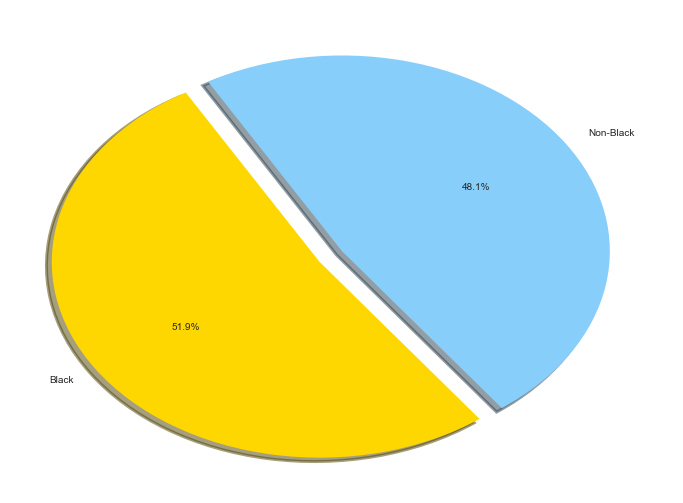

In [183]:
data_0 = len(df.loc[df['Race'] == 'B'])
data_1 = df

sizes = [51.8,48.1]

labels = 'Black', 'Non-Black'
colors = ['gold','lightskyblue']
explode = (0.1, 0)  # explode 1st slice
plt.style.use('seaborn-white');


plt.figure(figsize=(12, 9));

plt.pie(sizes, labels=labels, explode=explode,colors=colors,wedgeprops = {'linewidth': 3},
autopct='%1.1f%%', shadow=True, startangle=120)

By looking at the pure proportions we can see that Blacks account for over half the stop and frisk cases. For the next part of the question,we will have to look at what the likelyhood/probabilty of these results were.

### Method

I will first gather data from the NYC Departmet of City Planning on the population of nyc and the total distribution by race. From there I will write a code that can predict the probability of selecting a Black person at random. I will set the code so that the excercise is carried out a statistically relvant number of times. From there we will be able to determine the likelyhood that Black people would be stopped this frequesntly only by random chance.

NB: Because the NYCDUP had not created a division between white hispanic and black hispanics, I will solely focus my work on Black/Afican Americans.

In [184]:
# From the NYC Department of city Planning
Population_of_NYC = 8175133
Population_of_Blacks = 1861295

In [185]:
Population_of_Blacks/Population_of_NYC

0.22767764145243877

NB: The percentage distribution of black vs non black populations under the age of 18 and 18+ is a difference between 25% and 22.2%. Given how similar they are, I do not believe it will alter the results in any major way. Additionally, while one might assume that the largest populations to be affects would be those over the age of 18, however I am working with the assumption that police officers will engage with younger civillians, either at the juvenile level or without realizing that they are younger than tehy actually are.

In [186]:
black_nonblack_ratio = [0.23,0.76]

In [187]:
def sample_proportions(sample_size, probabilities):
    return np.random.multinomial(sample_size, probabilities) / sample_size

In [188]:
sample_proportions(100, black_nonblack_ratio) #test

array([ 0.32,  0.68])

In [189]:
sample_proportions(5076509, black_nonblack_ratio) #given the entire population we have recordings of

array([ 0.23000649,  0.76999351])

In [190]:
100*sample_proportions(5076509, black_nonblack_ratio)[0]

23.000156209710259

In [191]:
counts = []

for i in range(1000):
    counts.append(100*sample_proportions(100,black_nonblack_ratio)[0])

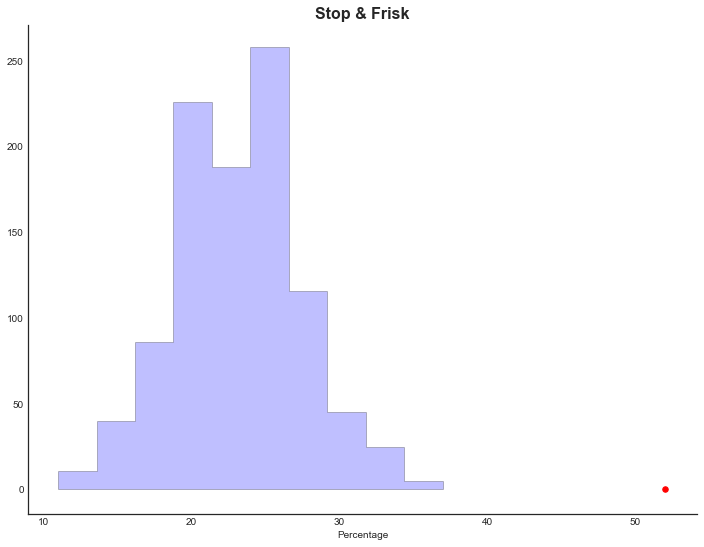

In [330]:
### plt.style.use('seaborn-white')
plt.figure(figsize=(12,9))
ax = plt.subplot()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title("Stop & Frisk",fontweight="bold", fontsize = 16)
plt.xlabel('Percentage')
plt.hist(counts, bins = 10,alpha = 0.25,
         histtype='stepfilled', color = 'blue', edgecolor='black');
plt.scatter(52, 0, color='red', s=30)

From the graph above we can conclude that it would be highly unlikely that we would get such large popolations of blakc people beign stopped if the searches were conducted at random. Therefore, the results lead me to believe that the stop and frisk program is biased in its treatment of NYC's black population.

### Part 2: *Earnings, gender & height*

### Background on the data
The National Longitudinal Surveys (NLS) are a set of surveys designed to gather information at multiple points in time on the labor market activities and other significant life events of several groups of men and women. For more than 4 decades, NLS data have served as an important tool for economists, sociologists, and other researchers. <br>

The NLS has 7 major cohorts that it has studied ( we are interested in the ones highlighted ): 
- **National Longitudinal Survey of Youth 1997 (NLSY97)**
- **National Longitudinal Survey of Youth 1979 (NLSY79)**
- NLSY79 Child and Young Adult
- Older Men
- Mature Women
- Young Men
- Young Women

The NLS has two major National Longitudinal Surveys of Youth (NLSY). One is from 1979 and the other is from 1997. Both collect data on employment, income, and personal characteristics from cohorts of people who were young at the time the surveys started. More specifically, 14 to 22 years old for NLSY79 and 12 to 17 years old for NLSY97. <br>

The latest datasets are from 2014 for NLSY79 and 2015 for NLSY97. Meaning that respondents would be in the 50s and their 30s, respectively.<br>

### Your task

The current task at hand is to look at the distribution of height and decide on who is tall / short. <br><br>

Then based on this, you want to see how the income distribution is according to a person being tall / short. With the pattern that you find, and that which points to a difference, you would like to test a set of hypotheses. <br><br>

One ( the null) is that the income distribution is random while the alternative is that indeed, heights and income have a relationship.<br><br>

Because both datasets are at their peak earning, please use both data sets (NLSY97 and NLSY79). Your analyses should be separate. Not all the data will be complete, so please clean your data accordingly and also make conclusions based on what you see.


### Where to get the gender, height, and earnings data

You can get the sex, height and earnings data from the NLS website. 

https://www.nlsinfo.org/investigator/pages/login.jsp

Use the search method to get you the right data that you want. Do this seprately for both the NYLS79 and NYLS97 data.


**As an example, to get the gender of NLSY97 from the site you would go to variable search and look for gender in Variable Search under the search tab. You would then click on add to add the data. In addition, you would then look for height (both feet and inches) in 2015 and earnings in 2014 or 2015 (or whichever you find as the latest).**

<img src = './earnings/gender.png'>

After that you can review the variables that you have chosen under the review tab

<img src = './earnings/review.png' width="75%" height="75%">

And then make sure to save your work as a CSV.
<img src = './earnings/download.png' width="75%" height="75%">

### Imortant Notice: Existence of similar work

There exists similar work on this studies on the internet. Please, if you need to, use that work more as a guide but not as the answer, as the computation and expected product from this is different from what you will see out there. Pay attention to the nuances to not be penalized for plagiarism.

# Part 3: The Math of Gender, Sex & Earnings

You will need the attend the last class to comfortably answer this section of the questions.

Please use the data you have in Part 2 to answer the following questions:
1. Please list the quartiles of the earnings for both NLYS79 and NLYS97 data sets
2. What is the correlation between height and earnings for each of the data sets? What is it when adjusted for gender
- what is the r value?
3. Please run a regression analysis on the data sets and comment on the effects of height and earnings.

### Importing csv databases

In [704]:
NLSY_1979 = pd.read_csv("/Users/oatileramsay/Downloads/NLSY79/NLSY79.csv")
NLSY_1979.head(2) #check

,R0000100,T3955100,T3955200,T5259900,T5597600
0,1,-5,-5,-5,-5
1,2,5,0,-4,2


In [767]:
NLSY_1997 = pd.read_csv("/Users/oatileramsay/Downloads/NLSY97/NLSY97.csv")
NLSY_1997.head(2) #check

,R0000100,R0536300,R0536401,R0536402,R1235800,R1482600,T7635600,T7635700,U0389900,U0390900
0,1,2,9,1981,1,4,5,7,-4,-4
1,2,1,7,1982,1,2,5,7,-4,-4


### Standardizing and cleaning the data

I will proceed by working on NLSY79 first, then NLSY97 last.

# NLSY79

#### Key:

R00001.00 = IDENTIFICATION CODE
                
T39551.00 = R HEIGHT IN FEET
                
T39552.00 = R HEIGHT IN INCHES
                
T52599.00 = AVERAGE MONTHLY EARNINGS BEFORE TAXES AND DEDUCTIONS
 
T55976.00 = R GENDER
            (1: MALE , 2: FEMALE)

#### Value Key:

VALID SKIP(-4) 

NON-INTERVIEW(-5)

Refusal(-1)  

Don't Know(-2)



In [706]:
NLSY_1979.head(2)

,R0000100,T3955100,T3955200,T5259900,T5597600
0,1,-5,-5,-5,-5
1,2,5,0,-4,2


In [707]:
df1 = NLSY_1979.rename(columns= {"R0000100": 'IDENTIFICATION CODE',
                                 "T3955100": 'HEIGHT IN FEET',
                                 "T3955200": 'HEIGHT IN INCHES',
                                 "T5259900": 'AVERAGE MONTHLY EARNINGS',
                                 "T5597600": 'GENDER'})
#Renaming Columns

In [708]:
df1.head(2)

,IDENTIFICATION CODE,HEIGHT IN FEET,HEIGHT IN INCHES,AVERAGE MONTHLY EARNINGS,GENDER
0,1,-5,-5,-5,-5
1,2,5,0,-4,2


In [709]:
df1 = df1.replace(-4, 0)

In [710]:
df1 = df1.replace(-5, 0)

In [711]:
df1 = df1.replace(-1, 0)

In [712]:
df1 = df1.replace(-2, np.nan)

In [713]:
df1.head(2) #Check

,IDENTIFICATION CODE,HEIGHT IN FEET,HEIGHT IN INCHES,AVERAGE MONTHLY EARNINGS,GENDER
0,1,NaN,NaN,NaN,NaN
1,2,5.0,0.0,NaN,2.0


In [714]:
df1.GENDER.replace([2.0, 1.0], ['Female', 'Male'], inplace=True)
df1.head()

,IDENTIFICATION CODE,HEIGHT IN FEET,HEIGHT IN INCHES,AVERAGE MONTHLY EARNINGS,GENDER
0,1,NaN,NaN,NaN,NaN
1,2,5.0,0.0,NaN,Female
2,3,5.0,10.0,NaN,Female
3,4,NaN,NaN,NaN,Female
4,5,NaN,NaN,NaN,NaN


In [717]:
len(df1)

12686

In [718]:
df1.isnull().sum(axis = 0)

IDENTIFICATION CODE             0
HEIGHT IN FEET               5411
HEIGHT IN INCHES             5410
AVERAGE MONTHLY EARNINGS    12523
GENDER                       5775
dtype: int64

In [719]:
df1 = df1.fillna(0)

In [721]:
df1.head(2)

,IDENTIFICATION CODE,HEIGHT IN FEET,HEIGHT IN INCHES,AVERAGE MONTHLY EARNINGS,GENDER
0,1,0.0,0.0,0.0,0
1,2,5.0,0.0,0.0,Female


In [722]:
df1['HEIGHT IN FEET']*= 12 #converting feet to inches

In [725]:
df1['HEIGHT'] = df1['HEIGHT IN FEET']+ df1['HEIGHT IN INCHES']

In [729]:
df1.head(2) #check

,IDENTIFICATION CODE,HEIGHT IN FEET,HEIGHT IN INCHES,AVERAGE MONTHLY EARNINGS,GENDER,HEIGHT
0,1,0.0,0.0,0.0,0,0.0
1,2,60.0,0.0,0.0,Female,60.0


In [730]:
df1 = df1[df1['AVERAGE MONTHLY EARNINGS']!= 0]

In [731]:
df1 = df1[df1['HEIGHT']!= 0]

In [732]:
df1.head()

,IDENTIFICATION CODE,HEIGHT IN FEET,HEIGHT IN INCHES,AVERAGE MONTHLY EARNINGS,GENDER,HEIGHT
13,14,60.0,8.0,700000.0,Female,68.0
273,274,72.0,4.0,260000.0,Male,76.0
497,498,60.0,9.0,500000.0,Male,69.0
680,681,60.0,11.0,32500.0,Male,71.0
702,703,60.0,8.0,120000.0,Female,68.0


In [748]:
earning_standard79 = standardize(df1['AVERAGE MONTHLY EARNINGS'])
height_standard79 = standardize(df1['HEIGHT'])

In [733]:
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(df1['HEIGHT'],df1['AVERAGE MONTHLY EARNINGS'])

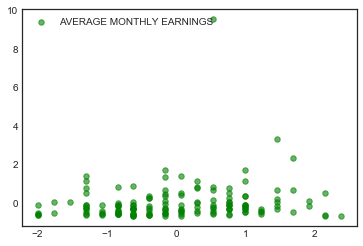

In [834]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(height_standard79, earning_standard79, s=30, color='g', alpha = 0.6);
plt.legend(loc='upper left')
plt.show()

In [835]:
np.corrcoef(height_standard79, earning_standard79)[0,1]

0.15317719669772242

While there is a positive correlation between height and earning. The correlation is only slight.

### QUESTION 3A: CORRELATION BETWEEN HEIGHT AND EARNINGS BY GENDER NLSY1979

I am going to devide the results into two parts. One male and the other female, because I expect average heights of the two groups to be different. Therefore I would like to avoid the results of one dataset affecting the other. For instance, I would like to know if a relatively tall woman makes more than a relatively shorter woman.I would not want to confuse the results of a relatively tall woman with an relatively average man. 
I also expect gender to contribute to an individuals earnings. Essentially I expect women's average earning to be lower as well.

In [737]:
f_earning = df1.loc[df1['GENDER'] == 'Female']
f_earning.head()

,IDENTIFICATION CODE,HEIGHT IN FEET,HEIGHT IN INCHES,AVERAGE MONTHLY EARNINGS,GENDER,HEIGHT
13,14,60.0,8.0,700000.0,Female,68.0
702,703,60.0,8.0,120000.0,Female,68.0
745,746,60.0,4.0,500000.0,Female,64.0
1086,1087,60.0,3.0,90000.0,Female,63.0
1309,1310,60.0,8.0,10000.0,Female,68.0


In [738]:
m_earning = df1.loc[df1['GENDER'] == 'Male']
m_earning.head()

,IDENTIFICATION CODE,HEIGHT IN FEET,HEIGHT IN INCHES,AVERAGE MONTHLY EARNINGS,GENDER,HEIGHT
273,274,72.0,4.0,260000.0,Male,76.0
497,498,60.0,9.0,500000.0,Male,69.0
680,681,60.0,11.0,32500.0,Male,71.0
734,735,72.0,1.0,90000.0,Male,73.0
762,763,60.0,10.0,200000.0,Male,70.0


Determining who is 'tall' and 'short' for both datasets. Anyone above the mean will be considered tall and anyone below will be considered short.

In [739]:
f_earning['HEIGHT'].mean()

64.36111111111111

In [740]:
m_earning['HEIGHT'].mean()

70.67088607594937

In [741]:
def fheight(x):
    if x >= 64.36111111111111:
        return 'tall'
    else:
        return 'short'

In [742]:
f_earning['Relative Height'] = f_earning['HEIGHT'].apply(fheight)
f_earning.head()

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,IDENTIFICATION CODE,HEIGHT IN FEET,HEIGHT IN INCHES,AVERAGE MONTHLY EARNINGS,GENDER,HEIGHT,Relative Height
13,14,60.0,8.0,700000.0,Female,68.0,tall
702,703,60.0,8.0,120000.0,Female,68.0,tall
745,746,60.0,4.0,500000.0,Female,64.0,short
1086,1087,60.0,3.0,90000.0,Female,63.0,short
1309,1310,60.0,8.0,10000.0,Female,68.0,tall


In [743]:
def mheight(x):
    if x >= 70.67088607594937:
        return 'tall'
    else:
        return 'short'

In [744]:
m_earning['Relative Height'] = m_earning['HEIGHT'].apply(mheight)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [609]:
f_earning.head()

,IDENTIFICATION CODE,HEIGHT IN FEET,HEIGHT IN INCHES,AVERAGE MONTHLY EARNINGS,GENDER,HEIGHT,Relative Height
13,14,60.0,8.0,700000.0,Female,68.0,tall
702,703,60.0,8.0,120000.0,Female,68.0,tall
745,746,60.0,4.0,500000.0,Female,64.0,short
1086,1087,60.0,3.0,90000.0,Female,63.0,short
1309,1310,60.0,8.0,10000.0,Female,68.0,tall


### WOMEN NLSY1979

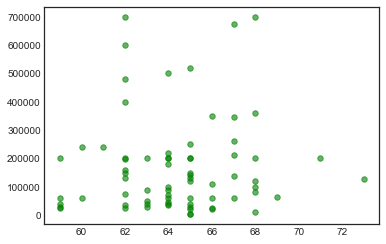

In [665]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(f_earning['HEIGHT'], f_earning['AVERAGE MONTHLY EARNINGS'], s=30, color='g', alpha = 0.6);
plt.show()

In [399]:
np.corrcoef(f_earning['HEIGHT'], f_earning['AVERAGE MONTHLY EARNINGS'])[0,1]

0.069941830631959259

### MEN NLSY1979

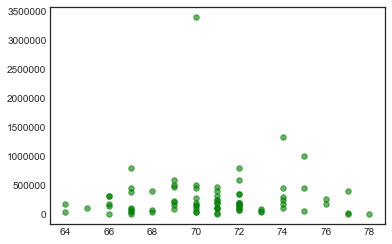

In [666]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(m_earning['HEIGHT'], m_earning['AVERAGE MONTHLY EARNINGS'], s=30, color='g', alpha = 0.6);
plt.show()

In [402]:
np.corrcoef(m_earning['HEIGHT'], m_earning['AVERAGE MONTHLY EARNINGS'])[0,1]

0.033926112687277514

#### What if we standardized the data?

In [651]:
def standardize(numbers):
    return (numbers - np.mean(numbers))/np.std(numbers) 

In [653]:
#Men
mheight_standard = standardize(m_earning['HEIGHT'])
mearnings_standard = standardize(m_earning['AVERAGE MONTHLY EARNINGS'])

#Women
fheight_standard = standardize(f_earning['HEIGHT'])
fearnings_standard = standardize(f_earning['AVERAGE MONTHLY EARNINGS'])

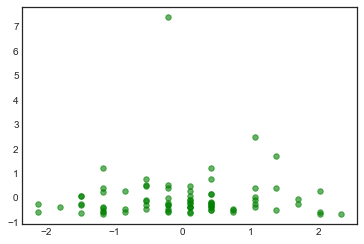

In [667]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(mheight_standard, mearnings_standard, s=30, color='g', alpha = 0.6);
plt.show()

In [655]:
np.corrcoef(mheight_standard, mearnings_standard)[0,1]

0.033926112687277514

In [656]:
linregress(mheight_standard,mearnings_standard)

LinregressResult(slope=0.033926112687277521, intercept=1.0759439304211826e-17, rvalue=0.033926112687277521, pvalue=0.76660317509759868, stderr=0.11389497434142061)

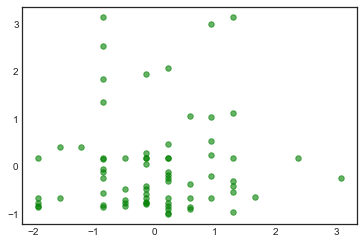

In [668]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(fheight_standard, fearnings_standard, s=30, color='g', alpha = 0.6);
plt.show()

In [658]:
np.corrcoef(fheight_standard, fearnings_standard)[0,1]

0.069941830631959301

In [659]:
linregress(fheight_standard,fearnings_standard)

LinregressResult(slope=0.069941830631959301, intercept=7.5149979289629463e-17, rvalue=0.069941830631959315, pvalue=0.55935146231062904, stderr=0.11923015799751396)

The correlation between women's earnings and their height seems almost nonexistant. Perhaps other factors play a greater role in the amount of money they make. My hypothesis based on external readings is that the correlation between height and earnings is generally based in how 'physically attractive' someone is. With this in mind height may play a smaller role in whether society deems women more attractive, relative to men.

# NLSY97

In [768]:
NLSY_1997.head()

,R0000100,R0536300,R0536401,R0536402,R1235800,R1482600,T7635600,T7635700,U0389900,U0390900
0,1,2,9,1981,1,4,5,7,-4,-4
1,2,1,7,1982,1,2,5,7,-4,-4
2,3,2,9,1983,1,2,5,-2,-5,-5
3,4,2,2,1981,1,2,5,1,-4,-4
4,5,1,10,1982,1,2,5,6,-4,-4


#### Key:

R0000100 = IDENTIFICATION CODE

R0536300 = GENDER (1: Male, 2: Female, 0: No Information )

R0536401 = BIRTHDATE MONTH

R0536402 = BIRTHDATE YEAR

R1235800 = CROSS-SECTIONAL OR OVERSAMPLE

R1482600 = RACE_ETHNICITY

T7635600 = HEIGHT IN FEET

T7635700 = HEIGHT IN INCHES

U0389900 = NONHOURLY EARNINGS(NO OVERTIME)

U0390900 = NONHOURLY EARNINGS (OVERTIME)

#### Value Key:

VALID SKIP(-4) 

NON-INTERVIEW(-5)

Refusal(-1)  

Don't Know(-2)


In [769]:
df2 = NLSY_1997.rename(columns=
                       {"R0000100": 'IDENTIFICATION CODE',
                        "R0536300": 'GENDER',
                        "R0536401": "BIRTHDATE MONTH",
                        "R0536402": "BIRTHDATE YEAR",
                        "R1235800": 'CROSS-SECTIONAL OR OVERSAMPLE',
                        "R1482600": 'RACE_ETHNICITY',
                        "T7635600":"HEIGHT IN FEET",
                        "T7635700": 'HEIGHT IN INCHES',
                        "U0389900":"NONHOURLY EARNINGS(NO OVERTIME)",
                        "U0390900": "NONHOURLY EARNINGS (OVERTIME)" })

In [770]:
df2.head(2)

,IDENTIFICATION CODE,GENDER,BIRTHDATE MONTH,BIRTHDATE YEAR,CROSS-SECTIONAL OR OVERSAMPLE,RACE_ETHNICITY,HEIGHT IN FEET,HEIGHT IN INCHES,NONHOURLY EARNINGS(NO OVERTIME),NONHOURLY EARNINGS (OVERTIME)
0,1,2,9,1981,1,4,5,7,-4,-4
1,2,1,7,1982,1,2,5,7,-4,-4


In [771]:
df2 = df2.replace(-4, 0)

In [772]:
df2 = df2.replace(-5, 0)

In [773]:
df2 = df2.replace(-2, 0)

In [774]:
df2 = df2.replace(-1, 0)

In [775]:
df2.head()

,IDENTIFICATION CODE,GENDER,BIRTHDATE MONTH,BIRTHDATE YEAR,CROSS-SECTIONAL OR OVERSAMPLE,RACE_ETHNICITY,HEIGHT IN FEET,HEIGHT IN INCHES,NONHOURLY EARNINGS(NO OVERTIME),NONHOURLY EARNINGS (OVERTIME)
0,1,2,9,1981,1,4,5,7,0,0
1,2,1,7,1982,1,2,5,7,0,0
2,3,2,9,1983,1,2,5,0,0,0
3,4,2,2,1981,1,2,5,1,0,0
4,5,1,10,1982,1,2,5,6,0,0


In [776]:
df2.GENDER.replace([2.0, 1.0], ['Female', 'Male'], inplace=True)
df2.head()

,IDENTIFICATION CODE,GENDER,BIRTHDATE MONTH,BIRTHDATE YEAR,CROSS-SECTIONAL OR OVERSAMPLE,RACE_ETHNICITY,HEIGHT IN FEET,HEIGHT IN INCHES,NONHOURLY EARNINGS(NO OVERTIME),NONHOURLY EARNINGS (OVERTIME)
0,1,Female,9,1981,1,4,5,7,0,0
1,2,Male,7,1982,1,2,5,7,0,0
2,3,Female,9,1983,1,2,5,0,0,0
3,4,Female,2,1981,1,2,5,1,0,0
4,5,Male,10,1982,1,2,5,6,0,0


In [777]:
df2['HEIGHT IN FEET']*=12
df2.head()

,IDENTIFICATION CODE,GENDER,BIRTHDATE MONTH,BIRTHDATE YEAR,CROSS-SECTIONAL OR OVERSAMPLE,RACE_ETHNICITY,HEIGHT IN FEET,HEIGHT IN INCHES,NONHOURLY EARNINGS(NO OVERTIME),NONHOURLY EARNINGS (OVERTIME)
0,1,Female,9,1981,1,4,60,7,0,0
1,2,Male,7,1982,1,2,60,7,0,0
2,3,Female,9,1983,1,2,60,0,0,0
3,4,Female,2,1981,1,2,60,1,0,0
4,5,Male,10,1982,1,2,60,6,0,0


In [778]:
df2['HEIGHT'] = df2['HEIGHT IN FEET']+ df2['HEIGHT IN INCHES']

In [779]:
df2.head()

,IDENTIFICATION CODE,GENDER,BIRTHDATE MONTH,BIRTHDATE YEAR,CROSS-SECTIONAL OR OVERSAMPLE,RACE_ETHNICITY,HEIGHT IN FEET,HEIGHT IN INCHES,NONHOURLY EARNINGS(NO OVERTIME),NONHOURLY EARNINGS (OVERTIME),HEIGHT
0,1,Female,9,1981,1,4,60,7,0,0,67
1,2,Male,7,1982,1,2,60,7,0,0,67
2,3,Female,9,1983,1,2,60,0,0,0,60
3,4,Female,2,1981,1,2,60,1,0,0,61
4,5,Male,10,1982,1,2,60,6,0,0,66


In [780]:
del df2['BIRTHDATE YEAR']

In [781]:
del df2['CROSS-SECTIONAL OR OVERSAMPLE']

In [782]:
del df2['BIRTHDATE MONTH']

In [783]:
del df2 ['RACE_ETHNICITY']

In [784]:
del df2 ['NONHOURLY EARNINGS (OVERTIME)']

In [786]:
df2.head(2)

,IDENTIFICATION CODE,GENDER,HEIGHT IN FEET,HEIGHT IN INCHES,NONHOURLY EARNINGS(NO OVERTIME),HEIGHT
0,1,Female,60,7,0,67
1,2,Male,60,7,0,67


In [787]:
df2 = df2[df2['HEIGHT']!= 0]

In [788]:
df2 = df2[df2['NONHOURLY EARNINGS(NO OVERTIME)']!= 0]

In [789]:
len(df2)

635

In [792]:
df2.head()

,IDENTIFICATION CODE,GENDER,HEIGHT IN FEET,HEIGHT IN INCHES,NONHOURLY EARNINGS(NO OVERTIME),HEIGHT
15,16,Male,72,6,600000,78
22,23,Female,48,11,7500000,59
23,24,Male,60,6,10000,66
60,61,Female,60,2,168000,62
73,74,Male,60,10,12000000,70


In [793]:
df2['HEIGHT'].min()

1

In [794]:
df2.loc[df2['HEIGHT'] == 1]

,IDENTIFICATION CODE,GENDER,HEIGHT IN FEET,HEIGHT IN INCHES,NONHOURLY EARNINGS(NO OVERTIME),HEIGHT
6054,6071,Female,0,1,35000,1
8066,8094,Male,0,1,8000,1


In [795]:
df2 = df2[df2['HEIGHT']!= 1]

In [796]:
df2['HEIGHT'].min()

53

In [799]:
#Standardization
height_standard97 = standardize(df2['HEIGHT'])
earnings_standard97 = standardize(df2['NONHOURLY EARNINGS(NO OVERTIME)'])


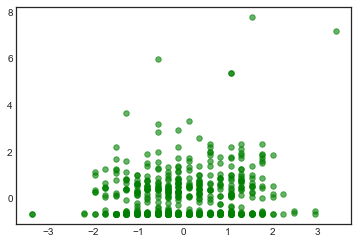

In [832]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(height_standard97, earnings_standard97 , s=30, color='g', alpha = 0.6);
plt.show()

In [833]:
np.corrcoef(height_standard97, earnings_standard97)[0,1]

0.14703061285860372

In [804]:
linregress(height_standard97, earnings_standard97)

LinregressResult(slope=0.14703061285860375, intercept=-9.1524356646835404e-17, rvalue=0.14703061285860375, pvalue=0.0002055495697714808, stderr=0.039376720879204373)

### QUESTION 3B: CORRELATION BETWEEN HEIGHT AND EARNINGS BY GENDER NLSY1997

I am going to devide the results into two parts. One male and the other female, because I expect average heights f the two groups to be different. Therefore I would like to avoid the results og one dataset affecting the other. For instance, I would like to know if a relatively tall woman makes more than a relatively shorter woman.I would not want to confuse the results of a relatively tall woman with an relatively average man. I also expect gender to contribute to an individuals earnings. Essentially I expect women's average earning to be lower as well.

In [806]:
f_earning97 = df2.loc[df2['GENDER'] == 'Female']
f_earning97.head(2)

,IDENTIFICATION CODE,GENDER,HEIGHT IN FEET,HEIGHT IN INCHES,NONHOURLY EARNINGS(NO OVERTIME),HEIGHT
22,23,Female,48,11,7500000,59
60,61,Female,60,2,168000,62


In [807]:
m_earning97 = df2.loc[df2['GENDER'] == 'Male']
m_earning97.head(2)

,IDENTIFICATION CODE,GENDER,HEIGHT IN FEET,HEIGHT IN INCHES,NONHOURLY EARNINGS(NO OVERTIME),HEIGHT
15,16,Male,72,6,600000,78
23,24,Male,60,6,10000,66


In [808]:
f_earning97['HEIGHT'].mean()

64.475

In [809]:
m_earning97['HEIGHT'].mean()

70.46006389776358

In [810]:
#Men
mheight_standard97 = standardize(m_earning97['HEIGHT'])
mearnings_standard97 = standardize(m_earning97['NONHOURLY EARNINGS(NO OVERTIME)'])

#Women
fheight_standard97 = standardize(f_earning97['HEIGHT'])
fearnings_standard97 = standardize(f_earning97['NONHOURLY EARNINGS(NO OVERTIME)'])

### WOMEN NLSY1979

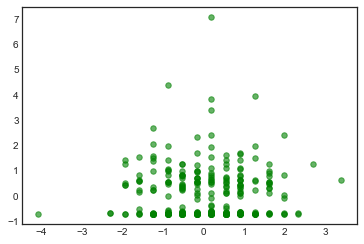

In [811]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(fheight_standard97, fearnings_standard97, s=30, color='g', alpha = 0.6);
plt.show()

In [812]:
np.corrcoef(fheight_standard97, fearnings_standard97)[0,1]

0.05247515752057004

In [813]:
linregress(fheight_standard97, fearnings_standard97)

LinregressResult(slope=0.052475157520570144, intercept=-1.5460387046965803e-16, rvalue=0.052475157520570047, pvalue=0.34944026408062512, stderr=0.05599995389270325)

### MEN NLSY1979

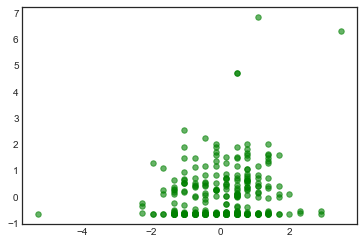

In [814]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(mheight_standard97 , mearnings_standard97, s=30, color='g', alpha = 0.6);
plt.show()

In [815]:
np.corrcoef(mheight_standard97, mearnings_standard97)[0,1]

0.20380997632724374

In [816]:
linregress(mheight_standard97, mearnings_standard97)

LinregressResult(slope=0.20380997632724415, intercept=-1.8044128524075689e-16, rvalue=0.20380997632724376, pvalue=0.00028396149218952406, stderr=0.05551459046213375)

## Comments

The data, seems relatively consistent with both the NLSY1979 and NLSY1997 groups.

Overall there is a positive correlation between height and earning. The correlation is only slight. Better results may be achieved with a larger sample size before averaging out the data. 

The correlation between women's earnings and their height seems almost nonexistant. Perhaps other factors play a greater role in the amount of money they make. My hypothesis based on external readings is that the correlation between height and earnings is generally based in how 'physically attractive' someone is. With this in mind height may play a smaller role in whether society deems women more attractive, relative to men.


When I started, I had expected stronger correlations. I do believe I could have used better samples. After cleaning the data I came to realize there where plenty of gaps in the earning data for both.
